# Yolov8 Object Detection On Self-Driving-Car Data

![self_driving](https://bernardmarr.com/wp-content/uploads/2021/07/How-Tesla-Is-Using-Artificial-Intelligence-to-Create-The-Autonomous-Cars-Of-The-Future.jpg)

## What is YOLO?
**You Only Look Once (YOLO) is a cutting-edge**

        method that significantly speeds up and simplifies the process of identifying objects in images and videos. Unlike traditional approaches, YOLO treats object detection as a single step, predicting object positions and categories directly.

        By doing so, it achieves real-time detection without sacrificing accuracy. YOLO's neural network architecture processes images swiftly, making it valuable for applications like self-driving cars, surveillance, and robotics.<br> YOLO's unique approach has revolutionized object detection by making it faster and more accessible while maintaining high performance.

## Import importnat Libraries

In [2]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import display
from glob import glob
import random
import cv2
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install ultralytics

   ---------------------------------------- 0.0/873.3 kB ? eta -:--:--
   ------------ --------------------------- 262.1/873.3 kB ? eta -:--:--
   ------------------------ --------------- 524.3/873.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 873.3/873.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/199.4 MB 2.4 MB/s eta 0:01:24
   ---------------------------------------- 0.5/199.4 MB 2.4 MB/s eta 0:01:24
   ---------------------------------------- 1.0/199.4 MB 1.6 MB/s eta 0:02:07
   ---------------------------------------- 1.6/199.4 MB 1.9 MB/s eta 0:01:47
   ---------------------------------------- 1.8/199.4 MB 1.9 MB/s eta 0:01:43
   ---------------------------------------- 2.4/199.4 MB 1.9 MB/s eta 0:01:43
    --------------------------------------- 2.6/199.4 MB 1.9 MB/s eta 0:01:42
    ----

## YOLOv8 is a group of neural network models. These models were created and trained using Pytorch and exported to files with the .pt extension. In this project we use the yolov8m.pt which is a middle-sized model for object detection.
        
        All yolo models for object detection ship already pre-trained on the COCO dataset, which is a huge collection images of 80 diffrent types

In [4]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:16<00:00, 3.20MB/s]


## Randomly selected some images from self-driving-cars image dataset to implement yolo model on them

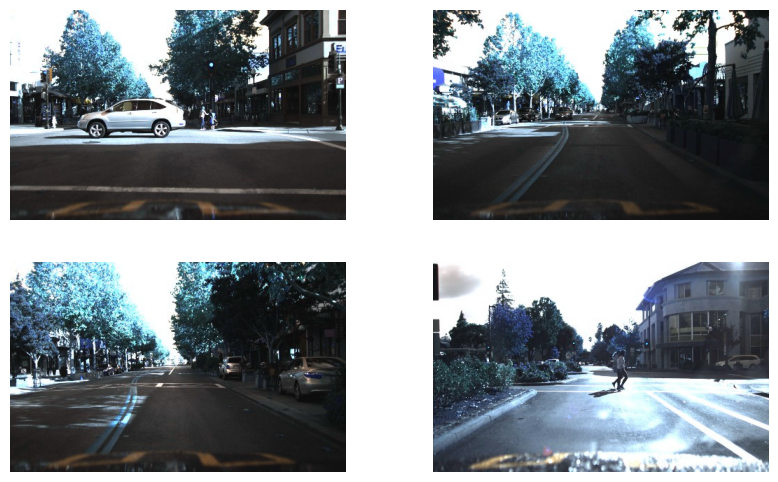

In [17]:
root_path = "D:\Beginner-Projects\Computer Vision\Object Detection\images"
num_samples = 4
images_data = glob(root_path + "/*.jpg")
random_images = random.sample(images_data, num_samples)

plt.figure(figsize=(10,6))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_images[i]))
    plt.axis('off')

## Extract significant results from the pretrained YOLOv8 model:
    - the name of the detected object 
    - bounding box coordinates
    - detection probabilities

In [20]:
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_images[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)

        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    images.append(output.plot()[:, :, ::-1])


image 1/1 D:\Beginner-Projects\Computer Vision\Object Detection\images\1478020384704893124.jpg: 416x640 3 persons, 1 car, 3 traffic lights, 364.1ms
Speed: 5.0ms preprocess, 364.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [95.68772888183594, 126.5157470703125, 251.13589477539062, 183.63450622558594]
Confidence is: 0.93
-------
Object 2 is: person
Coordinates are: [269.84234619140625, 137.89308166503906, 282.24456787109375, 171.73951721191406]
Confidence is: 0.72
-------
Object 3 is: traffic light
Coordinates are: [453.6689758300781, 58.03883743286133, 466.5736083984375, 91.1185531616211]
Confidence is: 0.63
-------
Object 4 is: traffic light
Coordinates are: [43.29884719848633, 85.48343658447266, 53.09366226196289, 104.5892333984375]
Confidence is: 0.58
-------
Object 5 is: person
Coordinates are: [283.2774658203125, 141.7029571533203, 295.0863952636719, 170.84707641601562]
Confidence is: 0.4
-------
Object 6 is: person
Coordin

## The result for the samples have been presented visually

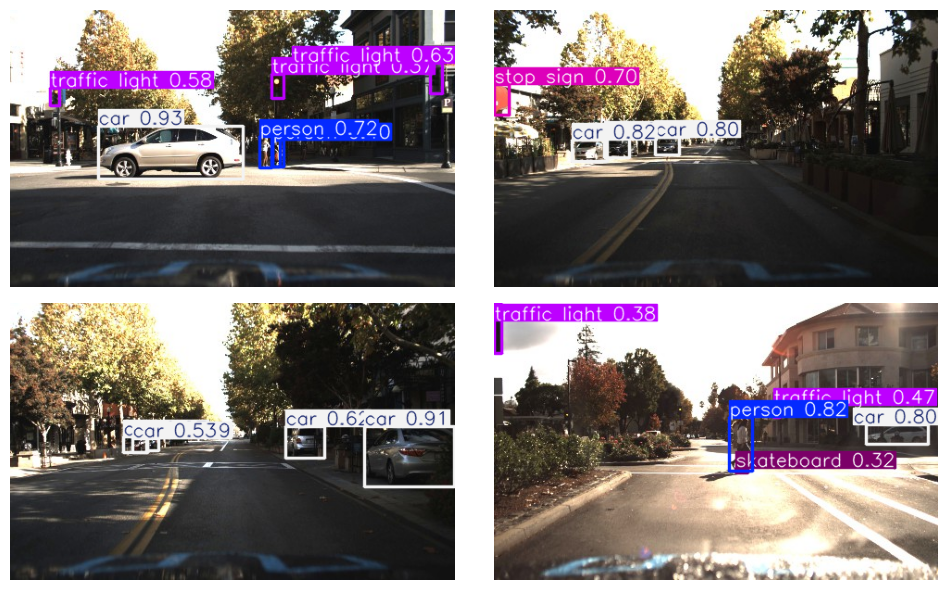

In [21]:
plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()